In [1]:
from crop_row_detection import ExG, skeleton, category_from_line, points_from_line, Line, TwoLines, apply_dbscan
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import os
from sklearn.cluster import DBSCAN

In [2]:
# Definitions

TRD_PATH = '../resources/therosariodataset/sequence03_selected/'
TRD_FILES = [
    'left_1514557404.402000.png', 'left_1514557432.437000.png', 'left_1514557475.010000.png',
    'left_1514557504.408000.png', 'left_1514557528.874000.png', 'left_1514557564.762000.png',
    'left_1514557578.585000.png', 'left_1514557602.532000.png', 'left_1514557604.999000.png',
]

Z22_PATH = '../resources/zavalla2022/'
Z22_FILES = [
    'left0807.jpg', 'left1187.jpg', 'left1492.jpg',
    'left1550.jpg', 'left1750.jpg', 'left1876.jpg',
]

Z23_PATH = '../resources/zavalla2023/'
Z23_FILES = [
    'left0034.jpg', 'left0162.jpg', 'left0387.jpg',
    'left0707.jpg', 'left0810.jpg',
]

SAVE_IMAGES = False
SAVE_PATH = 'resources/results/'
if SAVE_IMAGES:
    os.makedirs(SAVE_PATH, exist_ok=True)

In [3]:
# Read images
def read_images(path, imlist):
    images = []
    for imname in imlist:
        img = cv2.imread(path+imname)
        images.append(img)
    return images

# Make a gridplot of the images
def plot_images_grid(imlist, step=3, cvtcolor=False):
    rows = -(len(imlist) // -step)  # ceiling = upside-down floor
    fig, axs = plt.subplots(rows, step)
    for i,img in enumerate(imlist):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) if cvtcolor else img
        axs[i//step, i%step].imshow(img)
        axs[i//step, i%step].axis('off')
    return fig, axs


## Original Images

/tmp/ipykernel_10544/3383977010.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_10544/3383977010.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_10544/3383977010.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


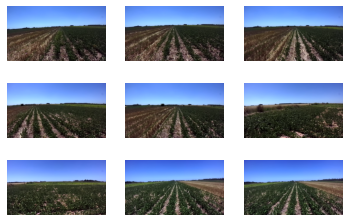

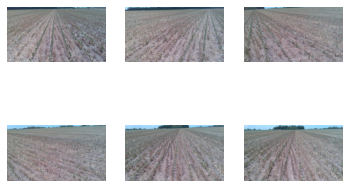

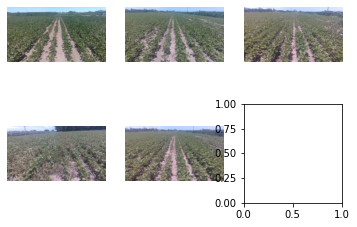

In [4]:
# The Rosario Dataset
trd_images = read_images(TRD_PATH, TRD_FILES)
fig, axs = plot_images_grid(trd_images, cvtcolor=True)
fig.show()

# Zavalla 2022
z22_images = read_images(Z22_PATH, Z22_FILES)
fig, axs = plot_images_grid(z22_images, cvtcolor=True)
fig.show()

# Zavalla 2023
z23_images = read_images(Z23_PATH, Z23_FILES)
fig, axs = plot_images_grid(z23_images, cvtcolor=True)
fig.show()

## Crop Row Detection

### Excess Green Vegetation Index (ExG)

/tmp/ipykernel_10544/48432291.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_10544/48432291.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_10544/48432291.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


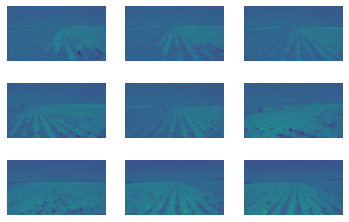

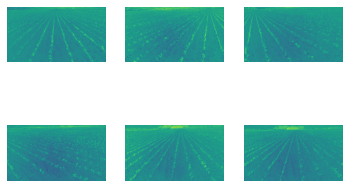

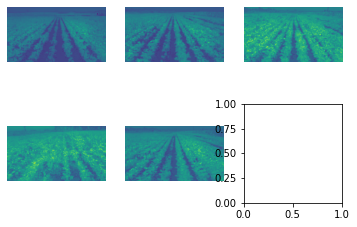

In [5]:
# The Rosario Dataset
trd_exg = []
for img in trd_images:
    i_img = ExG(img)
    trd_exg.append(i_img)
fig, axs = plot_images_grid(trd_exg)
fig.show()

# Zavalla 2022
z22_exg = []
for img in z22_images:
    i_img = ExG(img)
    z22_exg.append(i_img)
fig, axs = plot_images_grid(z22_exg)
fig.show()

# Zavalla 2023
z23_exg = []
for img in z23_images:
    i_img = ExG(img)
    z23_exg.append(i_img)
fig, axs = plot_images_grid(z23_exg)
fig.show()

### Otsu + Closing + Skeleton + Dilation

/tmp/ipykernel_10544/280302251.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_10544/280302251.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_10544/280302251.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


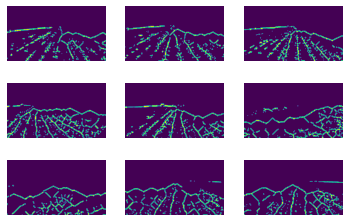

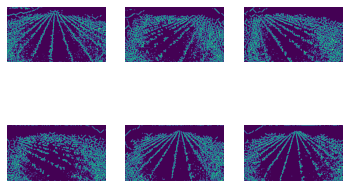

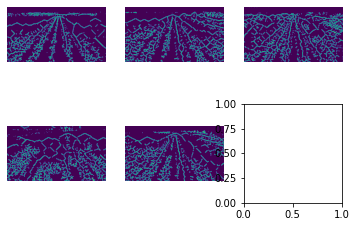

In [6]:
# The Rosario Dataset
trd_skeleton = []
for img in trd_exg:
    _, i_skele = cv2.threshold(img, 75, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    i_kernel = np.ones((7,7),np.uint8)
    i_skele = cv2.morphologyEx(i_skele, cv2.MORPH_CLOSE, i_kernel)
    i_skele = skeleton(i_skele, (9,9))
    i_kernel = np.ones((3,3),np.uint8)
    i_skele = cv2.dilate(i_skele, i_kernel)
    trd_skeleton.append(i_skele)
fig, axs = plot_images_grid(trd_skeleton)
fig.show()

# Zavalla 2022
z22_skeleton = []
for img in z22_exg:
    _, i_skele = cv2.threshold(img, 75, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    i_kernel = np.ones((7,7),np.uint8)
    i_skele = cv2.morphologyEx(i_skele, cv2.MORPH_CLOSE, i_kernel)
    i_skele = skeleton(i_skele, (9,9))
    i_kernel = np.ones((3,3),np.uint8)
    i_skele = cv2.dilate(i_skele, i_kernel)
    z22_skeleton.append(i_skele)
fig, axs = plot_images_grid(z22_skeleton)
fig.show()

# Zavalla 2023
z23_skeleton = []
for img in z23_exg:
    _, i_skele = cv2.threshold(img, 75, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    i_kernel = np.ones((7,7),np.uint8)
    i_skele = cv2.morphologyEx(i_skele, cv2.MORPH_CLOSE, i_kernel)
    i_skele = skeleton(i_skele, (9,9))
    i_kernel = np.ones((3,3),np.uint8)
    i_skele = cv2.dilate(i_skele, i_kernel)
    z23_skeleton.append(i_skele)
fig, axs = plot_images_grid(z23_skeleton)
fig.show()

### Hough Lines

/tmp/ipykernel_10544/71724438.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_10544/71724438.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_10544/71724438.py:59: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


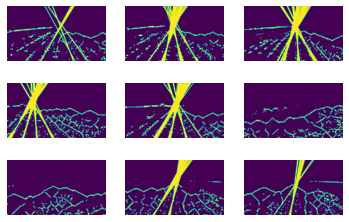

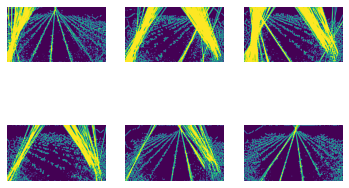

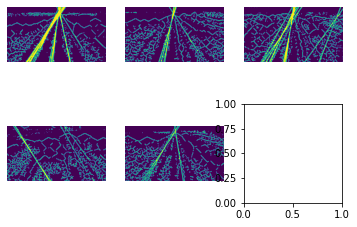

In [7]:
def non_horizontal_line(line, slope_thresh = 0.8):
    rho = line[0][0]
    theta = line[0][1]
    a = np.cos(theta)
    return abs(a) > slope_thresh

def plot_lines(img, lines):
    if lines is None:
        return img
    i_lines = img.copy()
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(i_lines, pt1, pt2, (255,255,255), 3, cv2.LINE_AA)
    return i_lines

def field_lines(img, hough_threshold=150):
    lines = cv2.HoughLines(img, 1, np.pi / 180, hough_threshold, None, 0, 0)
    if lines is None:
        return img, None
    lines = list(filter(non_horizontal_line, lines))
    if not lines:
        return img, None
    flattened_lines = np.vstack(lines)
    dbscan = DBSCAN(eps=5, min_samples=2)
    line_labels = dbscan.fit_predict(flattened_lines)
    lines = [line for line,lab in zip(lines, line_labels) if lab != -1]
    return plot_lines(img, lines), lines


# The Rosario Dataset
trd_lines = []
for img in trd_skeleton:
    i_img, lines = field_lines(img, hough_threshold=100)
    trd_lines.append(i_img)
fig, axs = plot_images_grid(trd_lines)
fig.show()

# Zavalla 2022
z22_lines = []
for img in z22_skeleton:
    i_img, i_lines = field_lines(img, hough_threshold=250)
    z22_lines.append(i_img)
fig, axs = plot_images_grid(z22_lines)
fig.show()

# Zavalla 2023
z23_lines = []
for img in z23_skeleton:
    i_img, i_lines = field_lines(img, hough_threshold=200)
    z23_lines.append(i_img)
fig, axs = plot_images_grid(z23_lines)
fig.show()

/tmp/ipykernel_10544/259776977.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_10544/259776977.py:101: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_10544/259776977.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


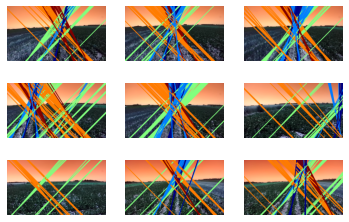

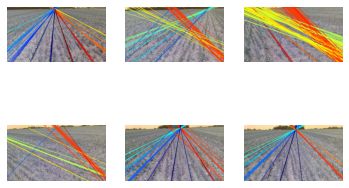

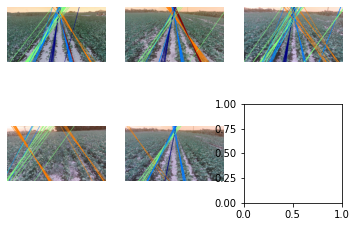

In [16]:
# The Rosario Dataset
trd_lines = []
trd_candidates = []
for idx_img,img in enumerate(trd_skeleton):
    lines = cv2.HoughLines(img, 1, np.pi / 180, 88, None, 0, 0)

    cdst = np.copy(trd_images[idx_img])

    # TODO this value should be defined in function of w and h
    c = 2000
    num_lines = 0
    slope_thresh = 0.7

    slope_max = 1.00000001
    step = 0.12
    candidates = {}
    half_num_cats = int((slope_max - slope_thresh) // step)
    num_cats = half_num_cats * 2
    if lines is not None:
        for i in range(0, len(lines)):
            # Line representation -> rho, theta
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho

            # Filter lines using slope_thresh
            if abs(a) > slope_thresh:

                # Discretize the space according to the slope
                category = category_from_line(theta, slope_thresh, step) #int(np.sign(a) * (abs(a) - slope_thresh) // step)
                line_ = Line(lines[i], category)
                if not (category in candidates):
                    candidates[category] = [line_]
                else:
                    candidates[category].append(line_)

                num_lines += 1

                # Plot each category with a different color      
                color = tuple(cv2.applyColorMap(np.uint8([[int(255 * (category + half_num_cats) / num_cats)]]), cv2.COLORMAP_JET).flatten().tolist())
                pt1, pt2 = points_from_line(rho, theta, c)
                cv2.line(cdst, pt1, pt2, color, 3, cv2.LINE_AA)
    trd_lines.append(cdst)
    trd_candidates.append(candidates)

fig, axs = plot_images_grid(trd_lines)
fig.show()

# Zavalla 2022
z22_lines = []
z22_candidates = []
for idx_img,img in enumerate(z22_skeleton):
    lines = cv2.HoughLines(img, 1, np.pi / 180, 350, None, 0, 0)

    cdst = np.copy(z22_images[idx_img])

    # TODO this value should be defined in function of w and h
    c = 2000
    num_lines = 0
    slope_thresh = 0.3

    slope_max = 1.00000001
    step = 0.06
    candidates = {}
    half_num_cats = int((slope_max - slope_thresh) // step)
    num_cats = half_num_cats * 2
    if lines is not None:
        for i in range(0, len(lines)):
            # Line representation -> rho, theta
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho

            # Filter lines using slope_thresh
            if abs(a) > slope_thresh:

                # Discretize the space according to the slope
                category = category_from_line(theta, slope_thresh, step) #int(np.sign(a) * (abs(a) - slope_thresh) // step)
                line_ = Line(lines[i], category)
                if not (category in candidates):
                    candidates[category] = [line_]
                else:
                    candidates[category].append(line_)

                num_lines += 1

                # Plot each category with a different color      
                color = tuple(cv2.applyColorMap(np.uint8([[int(255 * (category + half_num_cats) / num_cats)]]), cv2.COLORMAP_JET).flatten().tolist())
                pt1, pt2 = points_from_line(rho, theta, c)
                cv2.line(cdst, pt1, pt2, color, 3, cv2.LINE_AA)
    z22_lines.append(cdst)
    z22_candidates.append(candidates)

fig, axs = plot_images_grid(z22_lines)
fig.show()

# Zavalla 2023
z23_lines = []
z23_candidates = []
for idx_img,img in enumerate(z23_skeleton):
    lines = cv2.HoughLines(img, 1, np.pi / 180, 195, None, 0, 0)

    cdst = np.copy(z23_images[idx_img])

    # TODO this value should be defined in function of w and h
    c = 2000
    num_lines = 0
    slope_thresh = 0.78

    slope_max = 1.00000001
    step = 0.09
    candidates = {}
    half_num_cats = int((slope_max - slope_thresh) // step)
    num_cats = half_num_cats * 2
    if lines is not None:
        for i in range(0, len(lines)):
            # Line representation -> rho, theta
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho

            # Filter lines using slope_thresh
            if abs(a) > slope_thresh:

                # Discretize the space according to the slope
                category = category_from_line(theta, slope_thresh, step) #int(np.sign(a) * (abs(a) - slope_thresh) // step)
                line_ = Line(lines[i], category)
                if not (category in candidates):
                    candidates[category] = [line_]
                else:
                    candidates[category].append(line_)

                num_lines += 1

                # Plot each category with a different color      
                color = tuple(cv2.applyColorMap(np.uint8([[int(255 * (category + half_num_cats) / num_cats)]]), cv2.COLORMAP_JET).flatten().tolist())
                pt1, pt2 = points_from_line(rho, theta, c)
                cv2.line(cdst, pt1, pt2, color, 3, cv2.LINE_AA)
    z23_lines.append(cdst)
    z23_candidates.append(candidates)
fig, axs = plot_images_grid(z23_lines)
fig.show()

/tmp/ipykernel_10544/482185156.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_10544/482185156.py:127: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_10544/482185156.py:192: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


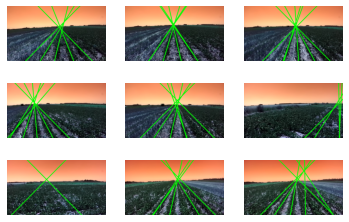

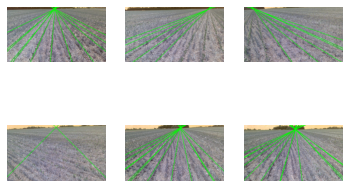

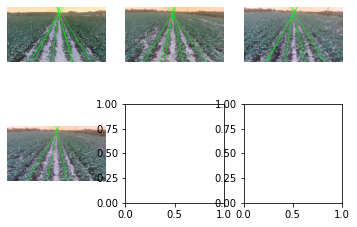

In [17]:
trd_solution = []
for idx_img,candidates in enumerate(trd_candidates):

    # Intersection of all lines, except those from the same category
    categories = list(candidates.keys())
    pair_of_lines = []
    skyline_min = 0
    skyline_max = 150
    for i in range(len(categories) - 1):
        for j in range(1,len(categories)-i):
            for k in candidates[categories[i+j]]:
                for l in candidates[categories[i]]:
                    line = TwoLines(l,k)
                    # print(line.intersection[0][1])
                    y_intersection = line.intersection[0][1]
                    if y_intersection > skyline_min and y_intersection < skyline_max:
                        pair_of_lines.append(TwoLines(l,k))

    pair_of_lines = np.array(pair_of_lines)
        
    # Estimate the coordinates of the intersections
    line_intersections = [l.intersection for l in pair_of_lines]

    # Apply DBSCAN to find clusters of intersections and potential outliers
    labels = apply_dbscan(line_intersections)

    # print(labels)
    try:
        non_negative_values, counts = np.unique(labels[labels >= 0], return_counts=True)
        most_frequent_index = np.argmax(counts)
        most_frequent_label = non_negative_values[most_frequent_index]
    except ValueError:
        continue

    # Filter out outliers 
    # non_outlier_indices = np.where(labels != -1)[0]
    # flattened_data = [point[0] for point in line_intersections]
    # non_outlier_data = [flattened_data[i] for i in non_outlier_indices]
    # non_outlier_labels = labels[non_outlier_indices]


    # Filter lines
    # Is this the best method to choose the vanishing point?
    indices = np.where(labels == most_frequent_label) 
    img_2 = np.copy(trd_images[idx_img])
    # print(pair_of_lines[indices])
    already_used_categories = []
    for p in pair_of_lines[indices]:
        cat_1 = p.line1.category
        cat_2 = p.line2.category
        if cat_1 in already_used_categories and cat_2 in already_used_categories:
            continue
        if cat_1 not in already_used_categories:
            already_used_categories.append(cat_1)    
            pt1, pt2 = points_from_line(p.line1.rho, p.line1.theta, c)
            cv2.line(img_2, pt1, pt2, (0,255,0), 3, cv2.LINE_AA)
        if cat_2 not in already_used_categories:
            already_used_categories.append(cat_2)    
            pt1, pt2 = points_from_line(p.line2.rho, p.line2.theta, c)
            cv2.line(img_2, pt1, pt2, (0,255,0), 3, cv2.LINE_AA)
    trd_solution.append(img_2)
fig, axs = plot_images_grid(trd_solution)
fig.show()

z22_solution = []
for idx_img,candidates in enumerate(z22_candidates):

    # Intersection of all lines, except those from the same category
    categories = list(candidates.keys())
    pair_of_lines = []
    skyline_min = 0
    skyline_max = 150
    for i in range(len(categories) - 1):
        for j in range(1,len(categories)-i):
            for k in candidates[categories[i+j]]:
                for l in candidates[categories[i]]:
                    line = TwoLines(l,k)
                    # print(line.intersection[0][1])
                    y_intersection = line.intersection[0][1]
                    if y_intersection > skyline_min and y_intersection < skyline_max:
                        pair_of_lines.append(TwoLines(l,k))

    pair_of_lines = np.array(pair_of_lines)
        
    # Estimate the coordinates of the intersections
    line_intersections = [l.intersection for l in pair_of_lines]

    # Apply DBSCAN to find clusters of intersections and potential outliers
    labels = apply_dbscan(line_intersections)

    # print(labels)
    try:
        non_negative_values, counts = np.unique(labels[labels >= 0], return_counts=True)
        most_frequent_index = np.argmax(counts)
        most_frequent_label = non_negative_values[most_frequent_index]
    except ValueError:
        continue

    # Filter out outliers 
    # non_outlier_indices = np.where(labels != -1)[0]
    # flattened_data = [point[0] for point in line_intersections]
    # non_outlier_data = [flattened_data[i] for i in non_outlier_indices]
    # non_outlier_labels = labels[non_outlier_indices]


    # Filter lines
    # Is this the best method to choose the vanishing point?
    indices = np.where(labels == most_frequent_label) 
    img_2 = np.copy(z22_images[idx_img])
    # print(pair_of_lines[indices])
    already_used_categories = []
    for p in pair_of_lines[indices]:
        cat_1 = p.line1.category
        cat_2 = p.line2.category
        if cat_1 in already_used_categories and cat_2 in already_used_categories:
            continue
        if cat_1 not in already_used_categories:
            already_used_categories.append(cat_1)    
            pt1, pt2 = points_from_line(p.line1.rho, p.line1.theta, c)
            cv2.line(img_2, pt1, pt2, (0,255,0), 3, cv2.LINE_AA)
        if cat_2 not in already_used_categories:
            already_used_categories.append(cat_2)    
            pt1, pt2 = points_from_line(p.line2.rho, p.line2.theta, c)
            cv2.line(img_2, pt1, pt2, (0,255,0), 3, cv2.LINE_AA)
    z22_solution.append(img_2)
fig, axs = plot_images_grid(z22_solution)
fig.show()


z23_solution = []
for idx_img,candidates in enumerate(z23_candidates):

    # Intersection of all lines, except those from the same category
    categories = list(candidates.keys())
    pair_of_lines = []
    skyline_min = 0
    skyline_max = 150
    for i in range(len(categories) - 1):
        for j in range(1,len(categories)-i):
            for k in candidates[categories[i+j]]:
                for l in candidates[categories[i]]:
                    line = TwoLines(l,k)
                    # print(line.intersection[0][1])
                    y_intersection = line.intersection[0][1]
                    if y_intersection > skyline_min and y_intersection < skyline_max:
                        pair_of_lines.append(TwoLines(l,k))

    pair_of_lines = np.array(pair_of_lines)
        
    # Estimate the coordinates of the intersections
    line_intersections = [l.intersection for l in pair_of_lines]

    # Apply DBSCAN to find clusters of intersections and potential outliers
    labels = apply_dbscan(line_intersections)

    # print(labels)
    try:
        non_negative_values, counts = np.unique(labels[labels >= 0], return_counts=True)
        most_frequent_index = np.argmax(counts)
        most_frequent_label = non_negative_values[most_frequent_index]
    except ValueError:
        continue

    # Filter out outliers 
    # non_outlier_indices = np.where(labels != -1)[0]
    # flattened_data = [point[0] for point in line_intersections]
    # non_outlier_data = [flattened_data[i] for i in non_outlier_indices]
    # non_outlier_labels = labels[non_outlier_indices]


    # Filter lines
    # Is this the best method to choose the vanishing point?
    indices = np.where(labels == most_frequent_label) 
    img_2 = np.copy(z23_images[idx_img])
    # print(pair_of_lines[indices])
    already_used_categories = []
    for p in pair_of_lines[indices]:
        cat_1 = p.line1.category
        cat_2 = p.line2.category
        if cat_1 in already_used_categories and cat_2 in already_used_categories:
            continue
        if cat_1 not in already_used_categories:
            already_used_categories.append(cat_1)    
            pt1, pt2 = points_from_line(p.line1.rho, p.line1.theta, c)
            cv2.line(img_2, pt1, pt2, (0,255,0), 3, cv2.LINE_AA)
        if cat_2 not in already_used_categories:
            already_used_categories.append(cat_2)    
            pt1, pt2 = points_from_line(p.line2.rho, p.line2.theta, c)
            cv2.line(img_2, pt1, pt2, (0,255,0), 3, cv2.LINE_AA)
    z23_solution.append(img_2)
fig, axs = plot_images_grid(z23_solution)
fig.show()
